# Compressione JPEG

## Step 1: operazioni preliminari

Per prima cosa eseguire la cella sottostante come mostrato in figura.

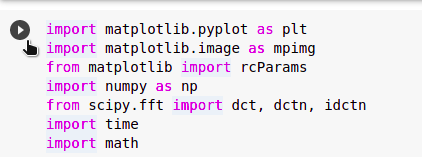

Verranno eseguiti gli import, viene definita la funzione per la compressione e vengono create le cartelle necessarie.

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import numpy as np
from scipy.fft import dct, dctn, idctn
import time
import math

import os
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

os.makedirs('img', exist_ok=True)
os.makedirs('compressed_img', exist_ok=True)

#funzione per comprimere immagine data dimensione blocchetto F e soglia d

def my_dct_compression(image, F, d):
  #compressed_image = image #copy to store the original image
  h = image.shape[0]
  w = image.shape[1]
  if h%F != 0:
    h = int(h/F) * F
  if w%F != 0:
    w = int(w/F) * F

  image_to_compress = image[0:h, 0:w]

  compressed_image = np.zeros((h, w))
  # cycle the image in step of F
  for x in range(0,h,F):
    for y in range(0,w,F):
      cell = image_to_compress[x:x+F, y:y+F]   # width of cell = F, height of cell = F
      cell = dctn(cell, type = 2, norm = 'ortho') # discrete cosine transform of the selected cell
      c_h = cell.shape[0]
      c_w = cell.shape[1]
      # delete the frequencies in the cell making reference to d parameter
      for i in range(0,c_h):
        for j in range(0,c_w):
          if i+j >= d:
            cell[i,j] = 0 
      
      # compute the inverse dct of the cell
      cell = idctn(cell, type = 2, norm = 'ortho')
      #round of ff at the nearest integer, put to 0 negative values, put to 255 bigger values
      for i in range(0,c_h):
        for j in range(0,c_w):
          value = np.round(cell[i,j])
          if value < 0:
            value = 0
          elif value > 255:
            value = 255
          cell[i,j] = value
      compressed_image[x:x+F, y:y+F] = cell

  return compressed_image

## Step 2: caricamento immagini

Caricare le immagini (in formato .bmp) nella cartella img ed eseguire la cella sotto, come mostrato in figura.

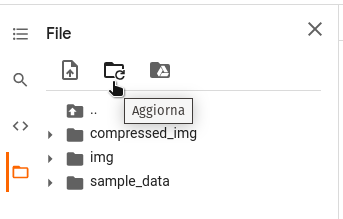

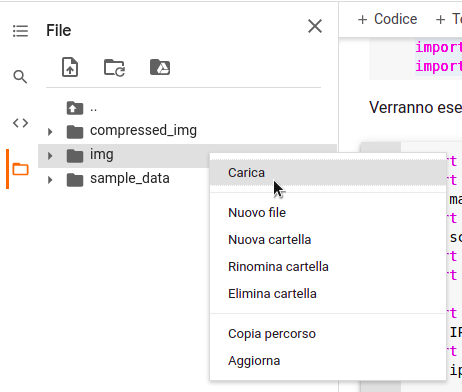

Dopo di che selezionare l'immagine dal menù a tendina.

In [ ]:
@interact
def show_image(file=os.listdir('img/')):
    global img_glob
    img_glob = mpimg.imread(fname='img/'+file, format='bmp')
    global img_name
    img_name = file
    rcParams['figure.figsize'] = 10 ,10
    fig, ax = plt.subplots(1,1)
    ax.axis('off')
    ax.imshow(img_glob, cmap='gray')

interactive(children=(Dropdown(description='file', options=('jump2.bmp', 'jump1.bmp', 'fireworks.bmp'), value=…

## Step 3: scelta dei parametri per la compressione

Eseguire la cella sotto e, attraverso gli slider, selezionare i valori di F e d desiderati.

In [ ]:
@interact
def slider_F(F=(2, 20, 1)):
    global F_glob
    F_glob = F
    @interact
    def slider_d(d=(1, 2*F_glob - 2, 1)):
        global d_glob
        d_glob = d
        return
    return

interactive(children=(IntSlider(value=11, description='F', max=20, min=2), Output()), _dom_classes=('widget-in…

## Step 4: compressione immagine

Eseguire l'ultima cella: verrà effettuata la compressione e verranno visualizzate immagine originale e immagine compressa.
Verrà inoltre salvato il risultato nella cartella "compressed_img"

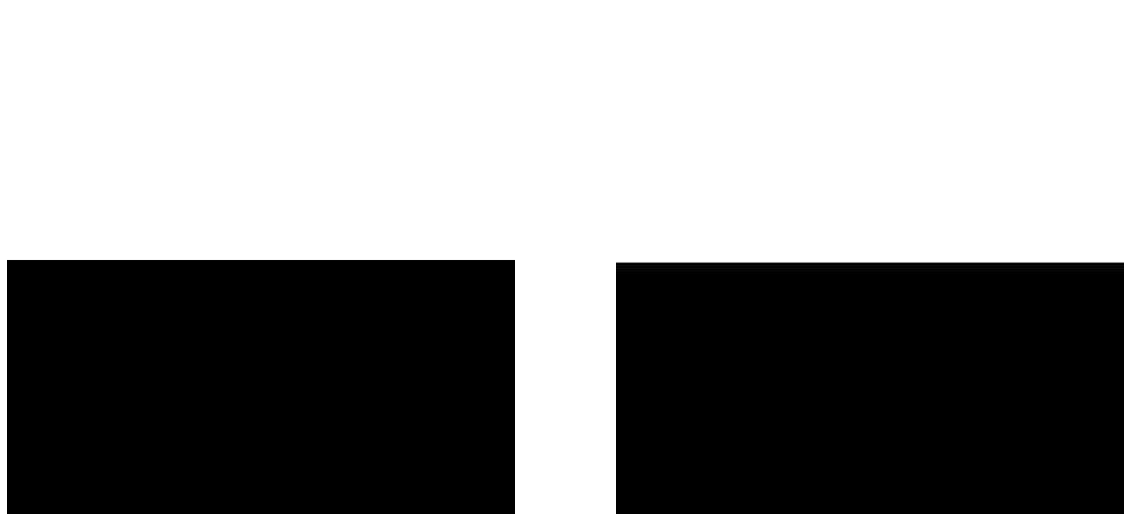

In [ ]:
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,20

# compress image
compressed_img = my_dct_compression(img_glob, F_glob, d_glob)

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(img_glob, cmap='gray')
ax[1].axis('off')
ax[1].imshow(compressed_img, cmap='gray')

#save plot (original image + compressed)
img_name = img_name.split(".")
img_name = img_name[0]
plt.savefig('compressed_img/'+ img_name + '_F=' + str(F_glob) + '_d=' + str(d_glob), bbox_inches='tight')